# Unweighted Average

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Importing the dataset
dataset = pd.read_csv('CVD dataset2.csv')
data=dataset.iloc[:, :].values
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 16].values
# X = dataset.iloc[:, [ 0, 1, 2, 5, 10, 11, 13, 15]].values

rows = len(data)    # 3 rows in your example
cols = len(data[0])
print(rows)
print(cols)

560
17


In [2]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [3]:
dataNoCvd = data[~(data[:,16] > 0.0)]
dataCvd = data[~(data[:,16] < 1.0)]
rowsNoCvd = len(dataNoCvd)    
rowsCvd = len(dataCvd)
print(rowsNoCvd)
print(rowsCvd)
# print(dataNoCvd)
# print(dataCvd)

519
41


In [4]:
def find_NoCvd_limitsArray(i,DownNoCvd, UpNoCvd, fold_NoCvd_total, fold_NoCvd_residue):
    if i>0 :
        DownNoCvd = UpNoCvd
        UpNoCvd= fold_NoCvd_total+UpNoCvd
    if i < fold_NoCvd_residue :
        UpNoCvd+= 1
#     print("NoCvd limits, Down :",DownNoCvd,"Up ",UpNoCvd)
    return   DownNoCvd, UpNoCvd   
 
def find_Cvd_limitsArray(i,DownCvd, UpCvd, fold_Cvd_total, fold_Cvd_residue,cv):
    if i>0 :
        DownCvd = UpCvd
        UpCvd= fold_Cvd_total+UpCvd
    if i >= cv - fold_Cvd_residue :
         UpCvd+= 1     
#     print("Cvd limits, Down :",DownCvd,"Up ",UpCvd)
    return   DownCvd, UpCvd  

def find_testValSubset(DownNoCvd,UpNoCvd,DownCvd,UpCvd):
    temp1=dataNoCvd[DownNoCvd:UpNoCvd,:]
    temp2=dataCvd[DownCvd:UpCvd,:]
    temp3=np.concatenate((temp1, temp2))
#     print(len(temp1),"  ",len(temp2),"  ",len(temp3))
    return temp3

def find_trainSubset(DownNoCvd,UpNoCvd,DownCvd,UpCvd):
    temp1 = np.delete(dataNoCvd, slice(DownNoCvd, UpNoCvd), axis=0)
    temp2 = np.delete(dataCvd, slice(DownCvd, UpCvd), axis=0)
    temp3 = np.concatenate((temp1, temp2))
#     print(len(temp1),"  ",len(temp2),"  ",len(temp3))
    return temp1, temp2, temp3

In [5]:
def create_train_test_sets(cv,dataNoCvd,dataCvd,val_ratio):
    test_total = []
    train_total = []
    train_total_Cvd = []
    train_total_NoCvd = []
    validation_total = []
    
    rowsNoCvd = len(dataNoCvd)    
    rowsCvd = len(dataCvd)

    fold_Cvd_total = rowsCvd//cv
    fold_Cvd_residue= rowsCvd%cv
    print("fold_Cvd_total  :",fold_Cvd_total," fold_Cvd_residue  :",fold_Cvd_residue)

    fold_NoCvd_total = rowsNoCvd//cv
    fold_NoCvd_residue= rowsNoCvd%cv
    print("fold_NoCvd_total:",fold_NoCvd_total,"fold_NoCvd_residue:",fold_NoCvd_residue)
    
    Cvd_val = round(504*val_ratio*(rowsCvd/len(data)))
    noCvd_val = round(504*val_ratio)-Cvd_val
    print(noCvd_val)
    
    DownNoCvd=0
    DownCvd=0
    UpNoCvd = fold_NoCvd_total
    UpCvd = fold_Cvd_total

    for i in range(cv):
        X_test = []
        y_test = []
        X_train = []
        y_train = []
        X_val = []
        y_val = []
#         print("============",i,"==============")
        DownNoCvd, UpNoCvd = find_NoCvd_limitsArray(i, DownNoCvd, UpNoCvd, fold_NoCvd_total, fold_NoCvd_residue)
        DownCvd, UpCvd = find_Cvd_limitsArray(i, DownCvd, UpCvd, fold_Cvd_total, fold_Cvd_residue,cv)
#         print(DownNoCvd,UpNoCvd,DownCvd,UpCvd)
        testSubset_total = find_testValSubset(DownNoCvd,UpNoCvd,DownCvd,UpCvd)
        if i!=9:
#             print(UpNoCvd,UpNoCvd+noCvd_val,UpCvd,UpCvd+Cvd_val)
            validationSubset_total = find_testValSubset(UpNoCvd,UpNoCvd+noCvd_val,UpCvd,UpCvd+Cvd_val)
#             print(DownNoCvd,UpNoCvd+noCvd_val,DownCvd,UpCvd+Cvd_val)
            trainSubset_NoCvd ,trainSubset_Cvd ,trainSubset_total = find_trainSubset(DownNoCvd,UpNoCvd+noCvd_val,DownCvd,UpCvd+Cvd_val)
        else:
#             print(DownNoCvd-noCvd_val,DownNoCvd,DownCvd-Cvd_val,DownCvd)
            validationSubset_total = find_testValSubset(DownNoCvd-noCvd_val,DownNoCvd,DownCvd-Cvd_val,DownCvd)
#             print(DownNoCvd-noCvd_val,UpNoCvd,DownCvd-Cvd_val,UpCvd)
            trainSubset_NoCvd ,trainSubset_Cvd ,trainSubset_total = find_trainSubset(DownNoCvd-noCvd_val,UpNoCvd,DownCvd-Cvd_val,UpCvd)
    #creating X_train, y_train, X_test, y_test
        X_test.append(np.delete(testSubset_total, 16, axis=1))
        y_test_temp = np.delete(testSubset_total, slice(0, 16), axis=1)
        y_test.append(np.reshape(y_test_temp, len(y_test_temp)))
        X_test_temp = np.array(X_test)
        X_test = X_test_temp[0]
        y_test_temp = np.array(y_test)
        y_test = y_test_temp[0]
        
        X_val.append(np.delete(validationSubset_total, 16, axis=1))
        y_val_temp = np.delete(validationSubset_total, slice(0, 16), axis=1)
        y_val.append(np.reshape(y_val_temp, len(y_val_temp)))
        X_val_temp = np.array(X_val)
        X_val = X_val_temp[0]
        y_val_temp = np.array(y_val)
        y_val = y_val_temp[0]
        
        X_train.append(np.delete(trainSubset_total, 16, axis=1))
        y_train_temp = np.delete(trainSubset_total, slice(0, 16), axis=1)
        y_train.append(np.reshape(y_train_temp, len(y_train_temp)))
        X_train_temp = np.array(X_train)
        X_train = X_train_temp[0]
        y_train_temp = np.array(y_train)
        y_train = y_train_temp[0]
        
    #add every subset in a list so we can handle thm later 
        test_total.append([X_test,y_test])
        validation_total.append([X_val,y_val])
        train_total.append([X_train,y_train]) 
        train_total_NoCvd.append(trainSubset_NoCvd)
        train_total_Cvd.append(trainSubset_Cvd)
    return train_total, test_total, validation_total, train_total_NoCvd, train_total_Cvd

In [6]:
train_total, test_total, validation_total, train_total_NoCvd, train_total_Cvd = create_train_test_sets(10,dataNoCvd,dataCvd,0.1)

fold_Cvd_total  : 4  fold_Cvd_residue  : 1
fold_NoCvd_total: 51 fold_NoCvd_residue: 9
46


In [7]:
print(X)

[[  2.    71.    18.    19.78   1.     1.     2.     1.     1.     1.
   55.     6.6   90.   153.    71.    50.  ]
 [  1.    38.     2.    23.31   1.     3.     1.     1.     1.     1.
   20.    10.   260.   189.    79.    47.  ]
 [  1.    81.     7.    29.06   1.     2.     2.     0.     1.     1.
   65.     5.4  140.   161.    90.    40.  ]
 [  1.    50.    11.    27.93   1.     3.     2.     0.     1.     1.
   40.     7.1  160.   204.    78.    45.  ]
 [  2.    62.    25.    20.7    2.     1.     1.     1.     1.     1.
   45.     4.2  100.   153.    51.    46.  ]
 [  1.    63.    14.    20.15   1.     1.     1.     0.     1.     1.
   50.     8.8  200.   156.    87.    41.  ]
 [  1.    65.     8.    30.19   1.     2.     2.     1.     1.     2.
   50.     8.   100.   173.   265.    33.  ]
 [  1.    46.     0.    32.95   2.     3.     1.     0.     1.     1.
   40.     5.4  114.   231.   246.    70.  ]
 [  1.    65.     6.    28.33   1.     1.     1.     0.     1.     1.
   45.    

In [8]:
from boostaroota import BoostARoota
import pandas as pd

#Specify the evaluation metric: can use whichever you like as long as recognized by XGBoost
  #EXCEPTION: multi-class currently only supports "mlogloss" so much be passed in as eval_metric
br = BoostARoota(metric='logloss')


#Fit the model for the subset of variables
br.fit(X, y)

#Can look at the important variables - will return a pandas series
br.keep_vars_

#Then modify dataframe to only include the important variables
br.transform(X)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
print(validation_total[0][1])

In [ ]:
for i in range(10):
    print(len(validation_total[i][0]))
    print(validation_total[i][1])

In [ ]:
for i in range(10):
    print(len(train_total[i][1]))

In [ ]:
# Chech ratio in each train and test set
def find_ratio(index_list):
    one = 0
    lenght=len(index_list[0])
    for i in range(lenght):
#         print(index_list[1])
        if index_list[1][i] == 1.0 :
            one+= 1
    ratio = one/lenght
    return ratio

for i in range(10):
    print(len(train_total[i][0]))
    ratio = find_ratio(train_total[i])
    print("ratio in train set:", ratio)
    ratio = find_ratio(test_total[i])
    print("ratio in test set:", ratio)

In [9]:
from xgboost import XGBClassifier


def my_fit(ratio,dataNoCvd,dataCvd, validation_total, params):   
    Subarray=[]
    models = []
    # yarray
    
    rowsNoCvd = len(dataNoCvd)    
    rowsCvd = len(dataCvd)
#     print("Size of NoCvd cases in train set:",rowsNoCvd)
#     print("Size of Cvd cases in train set  :",rowsCvd)


    numOfSubsamples = rowsNoCvd//(rowsCvd*ratio)
    numOfSubsamples= int(numOfSubsamples)
    SubNoCvd = rowsNoCvd//numOfSubsamples
    residue = rowsNoCvd- SubNoCvd*numOfSubsamples


    Up = 0


    for i in range(numOfSubsamples):
        
#         classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=params[5],
#                   colsample_bynode=1, colsample_bytree=params[8], gamma=params[4],
#                   learning_rate=params[0], max_delta_step=0, max_depth=params[1],
#                   min_child_weight=params[3], missing=None, n_estimators=params[2], n_jobs=1,
#                   nthread=None, objective='binary:logistic', random_state=0,
#                   reg_alpha=params[9], reg_lambda=params[6], scale_pos_weight=params[7], seed=None,
#                   silent=None, subsample=params[10], verbosity=1)
        classifier = XGBClassifier()
    #     print(i)
    #Creating the training set for each model
        Down = Up
        Up= Up + SubNoCvd
        if i < residue :
            Up+= 1
        
#         print(Down)
#         print(Up)
        
        Sub1=dataNoCvd[Down:Up,:]
        Sub2=np.concatenate((Sub1, dataCvd))
        Subarray.append(Sub2)
        
    #Dividing to X and y of the previous traing set    
        X=np.delete(Subarray[i], 16, axis=1)
        y=np.delete(Subarray[i], slice(0, 16), axis=1)
        y=np.reshape(y, len(y))
        
        X_val = validation_total[i][0]
        y_val = validation_total[i][1]
        
        eval_set  = [(X,y), (X_val,y_val)]
        
#         classifier.fit( X, y, eval_set=eval_set,
#         eval_metric="auc", early_stopping_rounds=50)
        classifier.fit( X, y)
        
        models.append(classifier)
    return models 

In [10]:


def predict_unweighted_average(models,X):
    y_pred = []
    y_pred_models = []

    models_size = len(models)
    X_size = len(X)
       
    #βρίσκω και αποθηκευω τα predictions κάθε μοντέλου για το Χ_test όχι όμως με την μορφή (0,1) όπως θα έκανε η
# predict αλλά με μορφή πιθανότητας να έρθει 1 με την predict_proba, δηλαδή τώρα ο πίνακας y_pred_models έχει τις 
# πιθανότητες κάθε περίπτωση του X_test να εμφανίσει Cvd
    for i in range(models_size): 
        y_pred_models.append(models[i].predict_proba(X)[:,1]) 

#Παίρνω τις πιθανότητες κάθε μοντέλου και για κάθε μία περίπτωση του X_test κάνω το average των πιθανοτήτων αυτών
# οπότε βγαίνει μια μέση πιθανότητα για κάθε μία περίπτωση του X_test.
    for j in range(X_size):
        sum = 0
        for i in range(models_size):
            sum = sum + y_pred_models[i][j]
        avr = sum/models_size
        if avr>= 0.5 :         #Όμως επειδή θεωρώ ότι το μοντέλο κάνει classification αν η μέση πιθανότητα 
            y_pred.append(1.)  # είναι μεγαλυτερη από 0.5 τότε θα επιστρέφει 1, δηλαδή ότι έχει cvd, αλλιώς 0
        else:
            y_pred.append(0.)
    return y_pred     
  

In [11]:
from collections import OrderedDict

k= {"ss":2,"pp":1,"oo":4}
ok = OrderedDict(sorted(k.items(), key=lambda x: x[1]))
lala= ok.popitem()
if lala[0] == 'oo':
    print("Hell yeah")
print(lala)
print(k)
print(ok)

# if k.get("o")!= None:
#     print(0)
# print(k.get("sp"))
l= {"ss":0,"pp":0}
l.update({"ss": k.get("ss")+l.get("ss")})
# print(l)


Hell yeah
('oo', 4)
{'ss': 2, 'pp': 1, 'oo': 4}
OrderedDict([('pp', 1), ('ss', 2)])


In [12]:
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

from sklearn.metrics import  confusion_matrix,roc_curve, roc_auc_score, accuracy_score
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from sklearn.model_selection import StratifiedKFold # import KFold
from sklearn import metrics
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost import XGBClassifier
from collections import OrderedDict
from boostaroota import BoostARoota
import pandas as pd


def my_cross_val( cv, train_total, test_total, validation_total, train_total_NoCvd, train_total_Cvd,params):
    accuracy = []
    specificity = []
    sensitivity = []
    auc = []
    # print(X)
    for i in range(cv):
#         X_train = train_total[i][0]
#         y_train = train_total[i][1]
        X_test = test_total[i][0]
        y_test = test_total[i][1]
        


        models = my_fit( 2, train_total_NoCvd[i], train_total_Cvd[i], validation_total,params)
        

        y_pred = predict_unweighted_average(models,X_test)

        cm = confusion_matrix(y_test, y_pred)
    #     print(cm)

        total1=sum(sum(cm))
        #####from confusion matrix calculate accuracy
        accuracy1=(cm[0,0]+cm[1,1])/total1
    #   print ('Accuracy : ', accuracy1)

        specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    #   print('Specificity : ', specificity1 )

        sensitivity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    #   print('Sensitivity : ', sensitivity1)
        
#         y = np.array(y_test)
#         pred = np.array(y_pred)
#         fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
#         auc1 = metrics.auc(fpr, tpr)
        
        auc1 = roc_auc_score(y_test, y_pred)

    
        accuracy.append(accuracy1)
        specificity.append(specificity1)
        sensitivity.append(sensitivity1) 
        auc.append(auc1)
        
    importancies_av = [[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],[0,10],[0,11],[0,12],[0,13],[0,14],[0,15]]
    importancies_vot = [[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],[0,10],[0,11],[0,12],[0,13],[0,14],[0,15]]
    times_used    = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for j in range(len(models)):
#         print(models[j].feature_importances_)
        # plot
        pyplot.bar(range(len(models[j].feature_importances_)), models[j].feature_importances_)
#         pyplot.show()
#         models[j].get_score(importance_type='gain')
        plot_importance(models[j],importance_type='weight')
        p =models[j].get_booster().get_score(importance_type="weight")
#         print(p)
        
        importancies_av,times_used = importances_average(p,importancies_av,times_used)
        importancies_vot = importances_voting(p,importancies_vot)
        importancies_vot.sort(key=lambda tup: tup[0],reverse=True)
#         plot_importance(models[j], max_num_features=16)
#         plot_importance(models[j],importance_type='weight')
#         pyplot.show()
    for i in range(len(importancies_av)):
        if times_used[i] != 0:
#             importancies_av[i][0] = importancies_av[i][0]/times_used[i]
            importancies_av[i][0] = importancies_av[i][0]/6
#         print(importancies[i])
    
   
    importancies_av.sort(key=lambda tup: tup[0],reverse=True)
    most_important_av = list()
    most_important_vot = list()
    for i in range(16):
        most_important_av.append(importancies_av[i])
        most_important_vot.append(importancies_vot[i])
    print(most_important_av)
    print(most_important_vot)

    return accuracy, specificity, sensitivity, auc



In [13]:
def importances_voting(p,importancies):
    op = OrderedDict(sorted(p.items(), key=lambda x: x[1]))
    for ii in range(8):
#         print(op)
        f = op.popitem()
#         print(f)
        if f[0] == 'f0':
            importancies[0][0] += 1
        if f[0] == 'f1':
            importancies[1][0] += 1
        if f[0] == 'f2':
            importancies[2][0] += 1
        if f[0] == 'f3':
            importancies[3][0] += 1
        if f[0] == 'f4':
            importancies[4][0] += 1
        if f[0] == 'f5':
            importancies[5][0] += 1
        if f[0] == 'f6':
            importancies[6][0] += 1
        if f[0] == 'f7':
            importancies[7][0] += 1
        if f[0] == 'f8':
            importancies[8][0] += 1
        if f[0] == 'f9':
            importancies[9][0] += 1
        if f[0] == 'f10':
            importancies[10][0] += 1
        if f[0] == 'f11':
            importancies[11][0] += 1
        if f[0] == 'f12':
            importancies[12][0] += 1
        if f[0] == 'f13':
            importancies[13][0] += 1
        if f[0] == 'f14':
            importancies[14][0] += 1
        if f[0] == 'f15':
            importancies[15][0] += 1
    return importancies
        

In [14]:
def importances_average(p,importancies,times_used):
        if p.get("f0")!= None:
            importancies[0][0] += p.get("f0")
            times_used[0] += 1
        if p.get("f1")!= None:
            importancies[1][0] += p.get("f1")
            times_used[1] += 1
        if p.get("f2")!= None:
            importancies[2][0] += p.get("f2")
            times_used[2] += 1
        if p.get("f3")!= None:
            importancies[3][0] += p.get("f3")
            times_used[3] += 1
        if p.get("f4")!= None:
            importancies[4][0] += p.get("f4")
            times_used[4] += 1
        if p.get("f5")!= None:
            importancies[5][0] += p.get("f5")
            times_used[5] += 1
        if p.get("f6")!= None:
            importancies[6][0] += p.get("f6")
            times_used[6] += 1
        if p.get("f7")!= None:
            importancies[7][0] += p.get("f7")
            times_used[7] += 1
        if p.get("f8")!= None:
            importancies[8][0] += p.get("f8")
            times_used[8] += 1
        if p.get("f9")!= None:
            importancies[9][0] += p.get("f9")
            times_used[9] += 1
        if p.get("f10")!= None:
            importancies[10][0] += p.get("f10")
            times_used[10] += 1
        if p.get("f11")!= None:
            importancies[11][0] += p.get("f11")
            times_used[11] += 1
        if p.get("f12")!= None:
            importancies[12][0] += p.get("f12")
            times_used[12] += 1
        if p.get("f13")!= None:
            importancies[13][0] += p.get("f13")
            times_used[13] += 1
        if p.get("f14")!= None:
            importancies[14][0] += p.get("f14")
            times_used[14] += 1
        if p.get("f15")!= None:
            importancies[15][0] += p.get("f15")
            times_used[15] += 1
        return importancies,times_used

In [15]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/        

params = {
                    "learning_rate"    :[0.4],  #0.01-0.2 Makes the model more robust by shrinking the weights on each step
                    "max_depth"        :[2],  #3-10 control over-fitting as higher depth will allow model to learn relations very specific to a particular sample
                    "n_estimators"     :[100],
                    "min_child_weight" :[2],         #0.5-1 small values might lead to under-fitting
                    "gamma"            :[0.5],            #Makes the algorithm conservative --> No overfitting
                    "colsample_bylevel" :[0.5], #0.5-1
                     "reg_lambda"      :[1], #  it should be explored to reduce overfitting.
                    "scale_pos_weight" :[4],
                    "colsample_bytree" :[0.75],
                    "reg_alpha"        :[0.1],
                    "subsample"        :[0.8]
    
        }
# [0.4, 2, 100, 2, 0.5, 0.5, 1, 4, 0.75, 0.1, 0.8]
# 0.6964285714285714
# 0.6976998491704374
# 0.685
# 0.6913499245852187

[0.4, 2, 100, 2, 0.5, 0.5, 1, 4, 0.75, 0.1, 0.8]
[[77.16666666666667, 13], [67.33333333333333, 3], [61.0, 15], [51.166666666666664, 11], [49.5, 2], [48.666666666666664, 14], [34.5, 1], [28.666666666666668, 10], [25.5, 12], [13.666666666666666, 5], [9.5, 6], [5.166666666666667, 8], [4.333333333333333, 4], [4.0, 0], [2.6666666666666665, 7], [1.3333333333333333, 9]]
[[4, 1], [4, 2], [4, 10], [4, 3], [4, 0], [3, 9], [3, 5], [3, 6], [3, 11], [3, 13], [3, 14], [2, 7], [2, 8], [2, 12], [2, 15], [2, 4]]


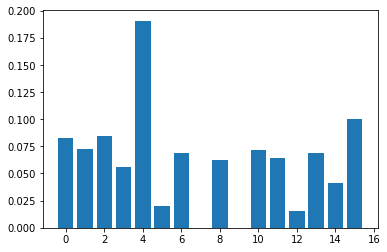

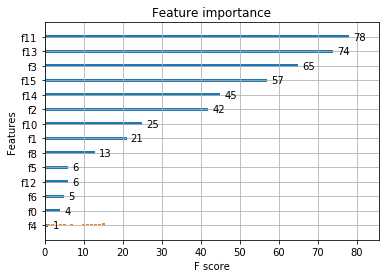

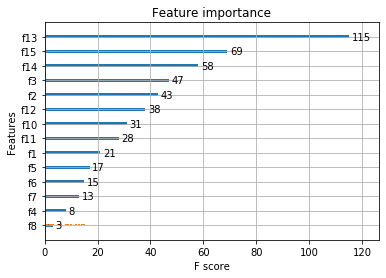

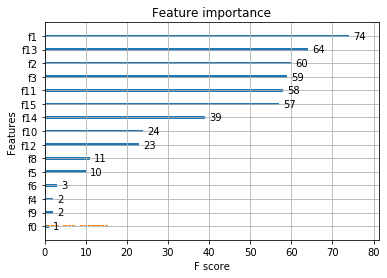

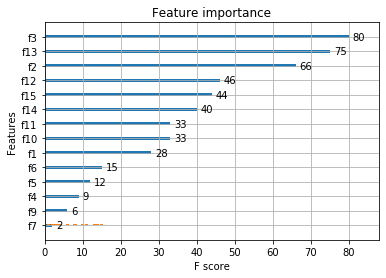

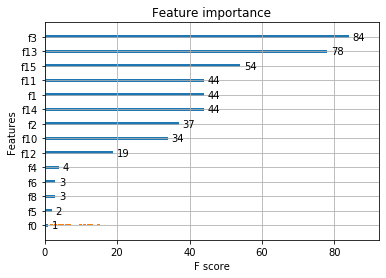

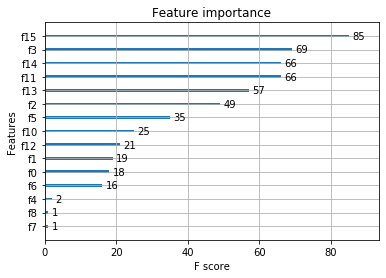

In [20]:
comb = compute_comb(params)
print(comb[0])
accuracy, specificity, sensitivity, auc = my_cross_val( 10, train_total, test_total,validation_total, train_total_NoCvd, train_total_Cvd,comb[0])

In [160]:
from statistics import mean
print(mean(accuracy))
print(mean(specificity))
print(mean(sensitivity))
print(mean(auc))

0.6785714285714286
0.6918552036199095
0.515
0.6034276018099548


In [17]:
# https://www.geeksforgeeks.org/python-all-possible-permutations-of-n-lists/

def compute_comb(params):
    
    # initializing lists 
    list1 = params.get("learning_rate")
    list2 = params.get("max_depth")
    list3 = params.get("n_estimators") 
    list4 = params.get("min_child_weight")
    list5 = params.get("gamma")    
    list6 = params.get("colsample_bylevel")
    list7 = params.get("reg_lambda") 
    list8 = params.get("scale_pos_weight")
    list9 = params.get("colsample_bytree")
    list10 = params.get("reg_alpha")
    list11 = params.get("subsample")
    

#     # printing lists  
#     print ("The original lists are : " + str(list1) +
#                                    " " + str(list2) + 
#                                    " " + str(list3) + 
#                                    " " + str(list4) + 
#                                    " " + str(list5) + 
#                                    " " + str(list6) +
#                                    " " + str(list7) +
#                                    " " + str(list8)) 

    # using list comprehension  
    # to compute all possible permutations 
    res = [[i, j, k, l, m, n, o, p,q,r,s] for i in list1  
                                          for j in list2 
                                          for k in list3 
                                          for l in list4 
                                          for m in list5 
                                          for n in list6 
                                          for o in list7
                                          for p in list8
                                          for q in list9
                                          for r in list10
                                          for s in list11] 

    # printing result 
#     print ("All possible permutations are : " +  str(res))
    return res

In [18]:
class style:
    BOLD = '\033[1m'
    END = '\033[0m'

In [19]:
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

from sklearn.metrics import  confusion_matrix,roc_curve, roc_auc_score, accuracy_score
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from sklearn.model_selection import StratifiedKFold # import KFold
from statistics import mean

def gridsearch(params):
    max_sens = 0
    max_spes = 0
    max_acc = 0
    best_params = []
    max_params = []
    max_auc = 0
    combs = compute_comb(params)
    print(len(combs))
    for j in range(len(combs)):
        print(j)
        accuracy, specificity, sensitivity, auc = my_cross_val( 10, train_total, test_total, validation_total, train_total_NoCvd, train_total_Cvd,combs[j])
        if mean(sensitivity)> 0.5 and mean(specificity)>0.6 and mean(accuracy)>0.6 and mean(auc)>0.5:
            print(style.BOLD + "----------------------------------------------------------------"+ style.END)
            print(combs[j])
            print (style.BOLD + 'accuracy    ' + style.END, mean(accuracy))
            print (style.BOLD + 'specificity ' + style.END, mean(specificity))
            print (style.BOLD + 'sensitivity ' + style.END, mean(sensitivity))
            print (style.BOLD + 'auc         ' + style.END, mean(auc))
            print(style.BOLD + "----------------------------------------------------------------"+ style.END)
        else:
            print(combs[j])
            print("accuracy    ",mean(accuracy))
            print("specificity ",mean(specificity))
            print("sensitivity ",mean(sensitivity))
            print("auc         ",mean(auc))
            
        best_params.append([combs[j],mean(accuracy),mean(specificity),mean(sensitivity),mean(auc)])
        if mean(auc)> max_auc:
            max_sens = mean(sensitivity)
            max_spes = mean(specificity)
            max_acc = mean(accuracy)
            max_auc = mean(auc)
            max_params = combs[j]
    return max_sens, max_params, max_spes, max_acc, max_auc, best_params